In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
import numpy as np

In [13]:
CabData = pd.read_csv('Cab_Data.csv')
CityData = pd.read_csv('City.csv')
CustomerData = pd.read_csv('Customer_ID.csv')
TransactionData = pd.read_csv('Transaction_ID.csv')

In [14]:
MasterData = (TransactionData.merge(CabData, how= 'inner')).merge(CustomerData, how='inner')
MasterData = MasterData.merge(CityData, how= 'inner')
MasterData #all the data merged into one, there were no NA values and no duplicated values


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001"
359388,10319775,51406,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001"
359389,10347676,51406,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001"
359390,10358624,51406,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Female,29,6829,"418,859","127,001"


In [15]:
#MasterData['Date of Travel'].to_csv('dates.csv')

In [46]:


#converting dates analysis
FormattedDates = pd.read_csv('dates.csv')
MasterData['Year'] = pd.Series([int(i[-4:]) for i in FormattedDates['Date of Travel']])
#CompanyData
CompanyData=MasterData.set_index("Company")
CompanyData['Profit'] = CompanyData['Price Charged']-CompanyData['Cost of Trip']
CompanyData
#PinkCab
Pink_Cab_Data = CompanyData.loc['Pink Cab', 'Payment_Mode':'Profit']
PinkYearly = []
#2016
Pink16 = Pink_Cab_Data.set_index('Year').loc[2016]
Pink16
#2017
Pink17 = Pink_Cab_Data.set_index('Year').loc[2017]

#2018
Pink18 = Pink_Cab_Data.set_index('Year').loc[2018]
PinkYearly.extend([Pink16, Pink17, Pink18])
#YellowCab
Yellow_Cab_Data = CompanyData.loc['Yellow Cab', 'Payment_Mode':'Profit']
YellowYearly = []
#2016
Yellow16 = Yellow_Cab_Data.set_index('Year').loc[2016]

#2017
Yellow17 = Yellow_Cab_Data.set_index('Year').loc[2017]

#2018
Yellow18 = Yellow_Cab_Data.set_index('Year').loc[2018]
YellowYearly.extend([Yellow16, Yellow17, Yellow18])



,Transaction ID,Customer ID,Payment_Mode,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year,Profit
Company,,,,,,,,,,,,,,,
Pink Cab,10000011,29290,Card,42377,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701",2016,57.3150
Yellow Cab,10351127,29290,Cash,43302,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701",2018,281.2772
Yellow Cab,10412921,29290,Card,43427,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701",2018,194.6480
Pink Cab,10000012,27703,Card,42375,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701",2016,23.6660
Yellow Cab,10320494,27703,Card,43211,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701",2018,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow Cab,10307228,51406,Cash,43162,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001",2018,143.6180
Yellow Cab,10319775,51406,Cash,43203,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001",2018,23.0464
Yellow Cab,10347676,51406,Card,43287,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001",2018,-5.8540


,Payment_Mode,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Profit
Year,,,,,,,,,,,,
2016,Card,42377,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701",57.315
2016,Card,42375,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701",23.666
2016,Cash,42371,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701",27.568
2016,Cash,42376,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701",25.798
2016,Cash,42670,ATLANTA GA,41.44,522.14,484.848,Male,23,23327,"814,885","24,701",37.292
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Card,42729,WASHINGTON DC,5.95,87.34,59.500,Male,53,20986,"418,859","127,001",27.840
2016,Card,42709,WASHINGTON DC,46.80,721.19,524.160,Female,31,7727,"418,859","127,001",197.030
2016,Card,42713,WASHINGTON DC,8.33,120.34,84.133,Male,48,12992,"418,859","127,001",36.207


In [120]:
#Profit Analysis

#Average Profit for each Company
print('Average Profit\n')
print(f"Pink Cab\nMean: {Pink_Cab_Data['Profit'].mean()}\nMedian: {Pink_Cab_Data['Profit'].median()}\n")
print(f"Yellow Cab\nMean: {Yellow_Cab_Data['Profit'].mean()}\nMedian: {Yellow_Cab_Data['Profit'].median()}\n\n")

#Average Profit per Kilometer for each Company
print('Average Profit/KM\n')
Pink_Cab_Data['Profit/KM'] = Pink_Cab_Data['Profit']/Pink_Cab_Data['KM Travelled']
Yellow_Cab_Data['Profit/KM'] = Yellow_Cab_Data['Profit']/Yellow_Cab_Data['KM Travelled']
print(f"Pink Cab\nMean: {Pink_Cab_Data['Profit/KM'].mean()}\nMedian: {Pink_Cab_Data['Profit/KM'].median()}\n")
print(f"Yellow Cab\nMean: {Yellow_Cab_Data['Profit/KM'].mean()}\nMedian: {Yellow_Cab_Data['Profit/KM'].median()}\n\n")

#Average Profit Per Year for each Company
for i in range(len(PinkYearly)):
    print(f"{i+2016} Pink Cab Profit\nMean: {PinkYearly[i]['Profit'].mean()}\nMedian: {PinkYearly[i]['Profit'].median()}\n")
    print(f"{i+2016} Yellow Cab Profit\nMean: {YellowYearly[i]['Profit'].mean()}\nMedian: {YellowYearly[i]['Profit'].median()}\n\n")

#Average Profit Per Person for each Company
print('Average Profit Per Person\n')

print(f"Pink Cab: {Pink_Cab_Data['Profit'].sum()/24701}")
print(f"Yellow Cab: {Yellow_Cab_Data['Profit'].sum()/127001}")

#Average Profit per City for each Company
Cities = set()
for i in CompanyData['City']:
    if i not in Cities:
        Cities.add(i)


PinkCities = Pink_Cab_Data.set_index('City')
YellowCities = Yellow_Cab_Data.set_index('City')
for i in Cities:
    print(f"{i} Averages\n\nPink Cab\nMean: {PinkCities.loc[i]['Profit'].mean()}\nMedian: {PinkCities.loc[i]['Profit'].median()}\nYellow Cab\nMean: {YellowCities.loc[i]['Profit'].mean()}\nMedian: {YellowCities.loc[i]['Profit'].median()}\n\n")


Average Profit

Pink Cab
Mean: 62.65217410961977
Median: 41.5

Yellow Cab
Mean: 160.25998584103021
Median: 101.99999999999997


Average Profit/KM

Pink Cab
Mean: 2.769907700396534
Median: 2.4235981308411207

Yellow Cab
Mean: 7.105507808353114
Median: 5.601622807017544


2016 Pink Cab Profit
Mean: 68.32181913875598
Median: 46.09200000000002

2016 Yellow Cab Profit
Mean: 169.34782076143924
Median: 109.6368


2017 Pink Cab Profit
Mean: 67.0708389564988
Median: 44.18000000000001

2017 Yellow Cab Profit
Mean: 168.81705657456536
Median: 110.43400000000003


2018 Pink Cab Profit
Mean: 53.2296891504606
Median: 35.93899999999999

2018 Yellow Cab Profit
Mean: 143.41612225817744
Median: 87.9452


Average Profit Per Person

Pink Cab: 214.8628930407676
Yellow Cab: 346.6143823339975
TUCSON AZ Averages

Pink Cab
Mean: 74.20472465581977
Median: 50.03
Yellow Cab
Mean: 71.52925830388692
Median: 46.02199999999999


AUSTIN TX Averages

Pink Cab
Mean: 78.93216809421843
Median: 55.806
Yellow Cab
Mean: 125.2

In [142]:
#Age Analysis
#Hypothesis 1: For both companies, most of their customers and therefore profit contribution comes from younger people.
MasterData['Age'].skew() #age is skewed right so there are more people from the younger range using these services in general
freq = {}
for i in MasterData['Age']:
    if i not in freq:
        freq.update({i:1})
    else:
        freq[i]+=1
#plt.plot(freq.keys(), freq.values(), 'o')
#Definine the age range: <30, 31-45, 46-60, 60+
Young = lambda x : x<=30
Middle1 = lambda x : 30<x<=45
Middle2 = lambda x : 45<x<60

AgegrpsP =  {'Young':{2016:[], 2017:[], 2018:[]}, 'Early Middle Age':{2016:[], 2017:[], 2018:[]}, 'Late Middle Age':{2016:[], 2017:[], 2018:[]}, 'Elderly':{2016:[], 2017:[], 2018:[]}}
AgegrpsY = {'Young':{2016:[], 2017:[], 2018:[]}, 'Early Middle Age':{2016:[], 2017:[], 2018:[]}, 'Late Middle Age':{2016:[], 2017:[], 2018:[]}, 'Elderly':{2016:[], 2017:[], 2018:[]}}
k=0
for year in PinkYearly:
    count = 0

    for i in year['Age']:
        if Young(i):
            AgegrpsP['Young'][2016+k].append(year['Profit'].iloc[count])
        elif Middle1(i):
            AgegrpsP['Early Middle Age'][2016+k].append(year['Profit'].iloc[count])
        elif Middle2(i):
            AgegrpsP['Late Middle Age'][2016+k].append(year['Profit'].iloc[count])
        else:
            AgegrpsP['Elderly'][2016+k].append(year['Profit'].iloc[count])
        count+=1
    k+=1

k=0
for year in YellowYearly:
    count = 0
    for i in year['Age']:
        if Young(i):
            AgegrpsY['Young'][2016+k].append(year['Profit'].iloc[count])
        elif Middle1(i):
            AgegrpsY['Early Middle Age'][2016+k].append(year['Profit'].iloc[count])
        elif Middle2(i):
            AgegrpsY['Late Middle Age'][2016+k].append(year['Profit'].iloc[count])
        else:
            AgegrpsY['Elderly'][2016+k].append(year['Profit'].iloc[count])
        count+=1
    k+=1

for i in AgegrpsP:
    Sum=0
    print(f"Percent Profit Composed of {i} Users\nPink:\n")
    for j in AgegrpsP[i]:
        Sum+=sum(AgegrpsP[i][j])
        print(f"{j}: {sum(AgegrpsP[i][j])/Pink_Cab_Data['Profit'].sum():.2%}")
    print(f"Total: {Sum/Pink_Cab_Data['Profit'].sum():.2%}")
    Sum=0
    print('\nYellow:\n')
    for k in AgegrpsY[i]:
        Sum+=sum(AgegrpsY[i][k])
        print(f"{k}: {sum(AgegrpsY[i][k])/Yellow_Cab_Data['Profit'].sum():.2%}")
    print(f"Total: {Sum/Yellow_Cab_Data['Profit'].sum():.2%}\n")




0.6853387825528561

Percent Profit Composed of Young Users
Pink:

2016: 13.62%
2017: 16.33%
2018: 12.38%
Total: 42.33%

Yellow:

2016: 13.16%
2017: 15.69%
2018: 12.71%
Total: 41.56%

Percent Profit Composed of Early Middle Age Users
Pink:

2016: 11.62%
2017: 13.92%
2018: 10.93%
Total: 36.47%

Yellow:

2016: 11.86%
2017: 13.98%
2018: 11.47%
Total: 37.31%

Percent Profit Composed of Late Middle Age Users
Pink:

2016: 4.86%
2017: 5.70%
2018: 4.30%
Total: 14.86%

Yellow:

2016: 4.72%
2017: 5.67%
2018: 4.65%
Total: 15.05%

Percent Profit Composed of Elderly Users
Pink:

2016: 2.18%
2017: 2.37%
2018: 1.79%
Total: 6.34%

Yellow:

2016: 1.90%
2017: 2.31%
2018: 1.88%
Total: 6.09%



0.3095622398389115

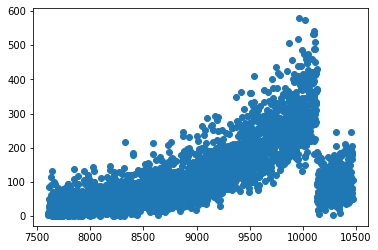

In [20]:
#Income Analysis
#Hypothesis 2: For both of the companies, most of the customer base and therefore profit contribution will be made from the lower class.
MasterData['Income (USD/Month)'].skew() #Income is skewed right
freq2 = {}
b = 1.001
for i in MasterData['Income (USD/Month)']:
    i = m.floor(m.log(i, b))+1
    if i not in freq2:
        freq2.update({i:1})
    else:
        freq2[i]+=1

sumfreq = {}

plt.plot(freq2.keys(), freq2.values(), 'o')

In [21]:
#Gender Analysis
#Hypothesis 3: For both companies, males make up most of the customer base and therefore contribute more to profit than females.
#Customer base for each company
Pink_Gender = Pink_Cab_Data['Gender']
counts=pd.Series(Pink_Gender).value_counts()
print(counts.get('Male')) # 84,711 customers total 47,231 males and 37,480 are females
Yellow_Gender = Yellow_Cab_Data['Gender']
counts=pd.Series(Yellow_Gender).value_counts() #
print(counts.get('Male')) # 274,681 customers total 158,681 are male and 116,000 are females

#Customer base broken down for each year
Pink_Gender2016 = Pink16['Gender']
counts=pd.Series(Pink_Gender2016).value_counts()
print(counts.get('Male'))
Yellow_Gender2016 = Yellow16['Gender']
counts=pd.Series(Yellow_Gender2016).value_counts()
print(counts.get('Male'))

Pink_Gender2017 = Pink17['Gender']
counts=pd.Series(Pink_Gender2017).value_counts()
print(counts.get('Male'))
Yellow_Gender2017 = Yellow17['Gender']
counts=pd.Series(Yellow_Gender2017).value_counts()
print(counts.get('Male'))

Pink_Gender2018 = Pink18['Gender']
counts=pd.Series(Pink_Gender2018).value_counts()
print(counts.get('Male'))
Yellow_Gender2018 = Yellow18['Gender']
counts=pd.Series(Yellow_Gender2018).value_counts()
print(counts.get('Male'))

#     Pink:               Yellow:
#2016:14,207 m  10,873 f 48,378 m  33,861 f
#2017:16,846 m  13,475 f 56,404 m  41,785 f
#2018:16,178 m  13,132 f 53,899 m  40,354 f


47231
158681
14207
48378
16846
56404
16178
53899


50719
164785
14997
49342
18124
58839
17598
56604


<BarContainer object of 4 artists>

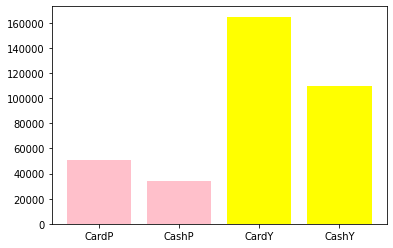

In [22]:
#Payment Type Analysis
#General
Pink_Cab = Pink_Cab_Data['Payment_Mode']
counts = pd.Series(Pink_Cab).value_counts()
print(counts.get('Card'))
Yellow_Cab = Yellow_Cab_Data['Payment_Mode']
counts = pd.Series(Yellow_Cab).value_counts()
print(counts.get('Card'))

#Hypothesis 4: For both companies, customers prefer card over credit as a payment type.
Pink_Card2016 = Pink16['Payment_Mode']
counts=pd.Series(Pink_Card2016).value_counts()
print(counts.get('Card'))
Yellow_Gender2016 = Yellow16['Payment_Mode']
counts=pd.Series(Yellow_Gender2016).value_counts()
print(counts.get('Card'))

Pink_Card2017 = Pink17['Payment_Mode']
counts=pd.Series(Pink_Card2017).value_counts()
print(counts.get('Card'))
Yellow_Gender2017 = Yellow17['Payment_Mode']
counts=pd.Series(Yellow_Gender2017).value_counts()
print(counts.get('Card'))

Pink_Card2018 = Pink18['Payment_Mode']
counts=pd.Series(Pink_Card2018).value_counts()
print(counts.get('Card'))
Yellow_Gender2018 = Yellow18['Payment_Mode']
counts=pd.Series(Yellow_Gender2018).value_counts()
print(counts.get('Card'))

#Vizualization 
x = ["CardP", "CashP", "CardY", "CashY"]
y = [50719, 33992, 164785, 109896]
c = ['pink','pink','yellow','yellow']
plt.bar(x, y, color=c)
plt.show()

